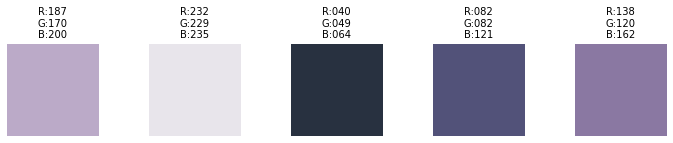

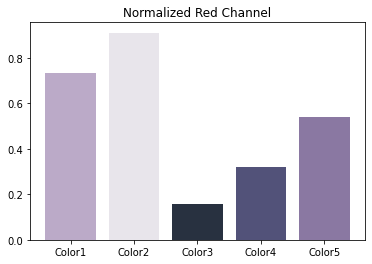

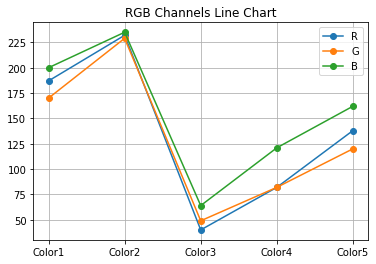

In [ ]:
# 提取图片配色
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

def extract_colors(image_path, n_colors=5):
    # 读取图像并转换颜色通道
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 数据扁平化，方便聚类
    flat_img = img.reshape((-1, 3))

    # 聚类提取主色
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(flat_img)
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # 颜色计数排序
    counts = Counter(labels)
    sorted_colors = [colors[i] for i in np.argsort([-counts[i] for i in counts])]

    return sorted_colors

def plot_color_blocks(colors):
    n = len(colors)
    fig, ax = plt.subplots(1, n, figsize=(n*2, 2))
    for i in range(n):
        color = colors[i]
        rgb_text = f"R:{color[0]:03d}\nG:{color[1]:03d}\nB:{color[2]:03d}"
        ax[i].imshow(np.ones((100, 100, 3), dtype=np.uint8) * color, interpolation='nearest')
        ax[i].set_title(rgb_text, fontsize=10)
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()

def plot_bar_line_graph(colors):
    labels = ['Color'+str(i+1) for i in range(len(colors))]
    rgb_values = np.array(colors)

    # 柱状图（R通道为例）
    plt.figure(figsize=(6, 4))
    plt.bar(labels, rgb_values[:, 0]/255, color=rgb_values/255.0)
    plt.title('Normalized Red Channel')
    plt.show()

    # 折线图（RGB全通道）
    plt.figure(figsize=(6, 4))
    for i, channel in enumerate(['R', 'G', 'B']):
        plt.plot(labels, rgb_values[:, i], label=channel, marker='o')
    plt.legend()
    plt.title('RGB Channels Line Chart')
    plt.grid(True)
    plt.show()

# === 示例用法 ===
image_path = "test2.png" 
n_colors = 5

colors = extract_colors(image_path, n_colors=n_colors)
plot_color_blocks(colors)
plot_bar_line_graph(colors)
